In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 6.0 Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 6.1 Computing the Cost Function

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx @ w
    mae = np.sum(np.abs(e))/(len(e))
    return mae

In [5]:
compute_loss(y, tx, (100, 20))

26.709334376543278

# 6.2 Grid Search

In [6]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for iW0 in range(0, len(w0)):
        for jW1 in range(0, len(w1)):
            losses[iW0][jW1] = compute_loss(y, tx, [w0[iW0], w1[jW1]])
    
    return losses

Grid Search: loss*=4.437591581488882, w0*=73.49397590361448, w1*=13.855421686747007, execution time=4.432 seconds


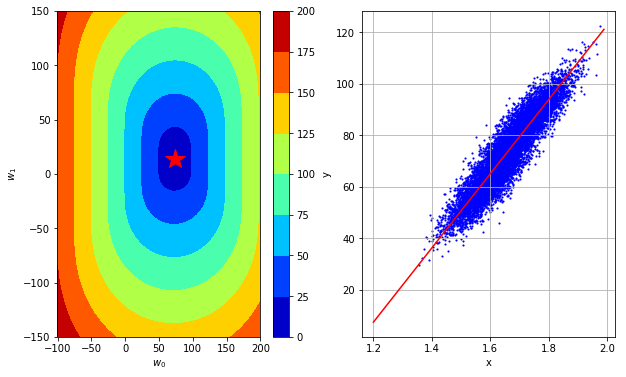

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=250)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 6.3 Gradient Descent

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - tx @ w
    grad = -tx.T @ np.sign(e)/(2*len(e))
    return grad

In [9]:
compute_gradient(y, tx, (1,2))

array([ -5.00000000e-01,   1.31876732e-15])

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210518, w0=0.35, w1=-9.23137122299522e-16
Gradient Descent(1/49): loss=72.94392200210518, w0=0.7, w1=-1.846274244599044e-15
Gradient Descent(2/49): loss=72.59392200210517, w0=1.0499999999999998, w1=-2.769411366898566e-15
Gradient Descent(3/49): loss=72.24392200210517, w0=1.4, w1=-3.692548489198088e-15
Gradient Descent(4/49): loss=71.89392200210517, w0=1.75, w1=-4.6156856114976105e-15
Gradient Descent(5/49): loss=71.54392200210518, w0=2.1, w1=-5.538822733797133e-15
Gradient Descent(6/49): loss=71.19392200210518, w0=2.45, w1=-6.461959856096655e-15
Gradient Descent(7/49): loss=70.84392200210517, w0=2.8000000000000003, w1=-7.385096978396178e-15
Gradient Descent(8/49): loss=70.49392200210517, w0=3.1500000000000004, w1=-8.3082341006957e-15
Gradient Descent(9/49): loss=70.14392200210519, w0=3.5000000000000004, w1=-9.231371222995223e-15
Gradient Descent(10/49): loss=69.79392200210518, w0=3.8500000000000005, w1=-1.0154508345294745e-14
Gradient Descent(11/

<function __main__.plot_figure>

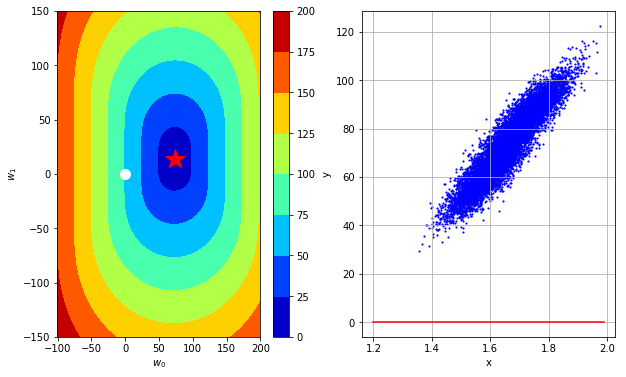

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact

grid_losses = grid_search(y, tx, grid_w0, grid_w1)

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 6.4 Stochastic gradient descent

In [13]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = y - tx @ w
    grad = -np.transpose(tx)@e
    return grad


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        grad = np.zeros(2)
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            grad += compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        grad = grad/batch_size
        loss = compute_loss(y, tx, w)
        # ***************************************************
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210518, w0=57.59506667650734, w1=33.58339435881276
Gradient Descent(1/49): loss=21.301647410610776, w0=72.19614044981137, w1=29.18030313495518
Gradient Descent(2/49): loss=13.447667873145157, w0=65.65966578982781, w1=23.292704392153905
Gradient Descent(3/49): loss=11.023997566071866, w0=64.37131334086759, w1=21.928379668282563
Gradient Descent(4/49): loss=11.025384133845778, w0=69.60304344884797, w1=19.71021611697602
Gradient Descent(5/49): loss=7.30200592577843, w0=74.49299322935815, w1=14.404222299241399
Gradient Descent(6/49): loss=4.598334226540039, w0=72.97552898444712, w1=15.30226527865213
Gradient Descent(7/49): loss=4.660737280611828, w0=67.4887630120592, w1=15.787355157260793
Gradient Descent(8/49): loss=6.832537874029006, w0=73.27142198868012, w1=19.623569454299947
Gradient Descent(9/49): loss=6.611265216662978, w0=83.38076450906935, w1=4.6783347525539565
Gradient Descent(10/49): loss=11.815811289447293, w0=82.06570398691825, w1=2.99946

<function __main__.plot_figure>

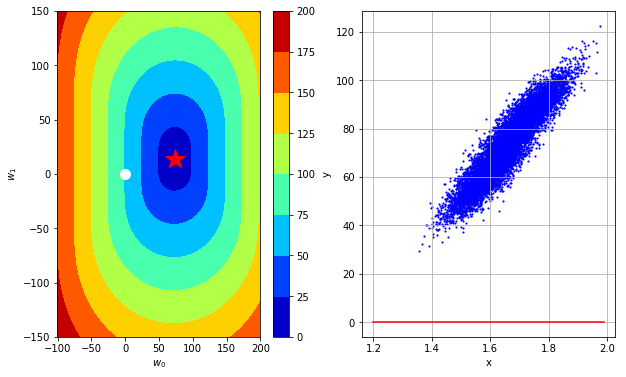

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))